In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [124]:
def UCB1(k, steps, runs, true_values, c):
    avg = np.zeros([steps])
    opt = np.zeros([steps])
    
    opt_arms = np.argmax(true_values,axis = 1)
    print(c)
    for i in range(runs):   
        '''
        Expected rewards of each arm. Each arm has a value and the number of times it has been pulled.
        ''' 
        Q = np.zeros([k])
        N = np.ones([k])
        
        '''
        Pull each arm once
        '''
        Q_1 = np.random.normal(true_values[i],1)
        
        avg[0] += np.mean(Q_1)  
        
        for j in range(2, steps+1):
            '''
            Selecting the arm which has highest upper confidence bound
            '''
            upper_bounds = Q + np.sqrt(c*np.log(j)/N)

            max_arm = np.argmax(upper_bounds)
            reward = np.random.normal(true_values[i][max_arm],1)
            
            N[max_arm] += 1
            Q[max_arm] = Q[max_arm] + (reward - Q[max_arm])/N[max_arm]         

            if opt_arms[i] == max_arm:
                opt[j-2]+=1

        
            avg[j-1] += reward
            

    avg = np.divide(avg, runs)
    opt = np.divide(opt, runs/100)
        
    return avg, opt
    
    

In [125]:
def plot_all(avg_reward, opt_percent, C):



#     fig1=plt.figure()
#     fig2=plt.figure()

#     fig1 = fig1.add_axes([0.1, 0.1, 0.6, 0.75])
#     fig2 = fig2.add_axes([0.1, 0.1, 0.6, 0.75])
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

#     x = np.zeros([len(avg_reward[0])])
#     for i in range(1,steps+1):
#         x[i-1] = i

    colors = ['r', 'g', 'k', 'b', 'y','m', 'c']
    for i in range(len(avg_reward)):
        fig1.plot(range(steps), avg_reward[i], colors[i], label = "c = " + str(C[i]) )

    for i in range(len(opt_percent)):
        fig2.plot(range(steps), opt_percent[i], colors[i], label = "c = " + str(C[i]) )

    fig1.title.set_text('UCB1 : Average Reward Vs Steps for 10 arms')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('Steps')
    fig1.set_ylim(-0.5,1.6)
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig2.title.set_text('UCB1 : $\%$ Optimal Action Vs Steps for 10 arms')
    fig2.set_ylabel(r'$\%$ Optimal Action')
    fig2.set_xlabel('Steps')
    fig2.set_ylim(0,100)
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig1 = fig1.get_figure()
    fig2 = fig2.get_figure()

    # fig1.savefig('fig1.jpg')
    # fig2.savefig('fig2.jpg')
    plt.show()


0.1
2
5


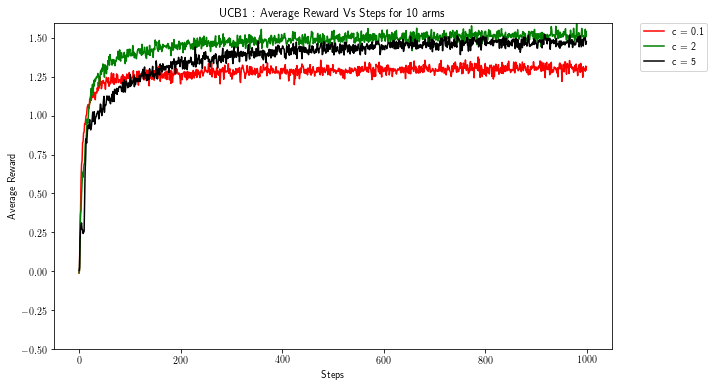

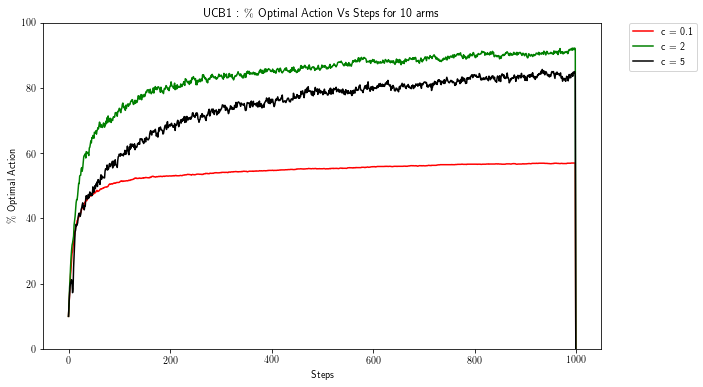

In [126]:
import math
from termcolor import colored

if __name__ == '__main__':
    steps = 1000
    runs = 2000
    k = 10
    mean = 0
    std_dev = 1
    C = [0.1, 2, 5]

    true_values = np.random.normal(mean, std_dev, (runs, k))
    
    avg_reward = []
    opt_arm = []
    
    for i in range(len(C)):
        avg, opt = UCB1(k, steps, runs, true_values, C[i])
        avg_reward.append(avg)
        opt_arm.append(opt)
    
    plot_all(avg_reward, opt_arm, C)

    

In [38]:
upper_bounds = Q + np.sqrt(c*np.log(j)/N)
c = 1
Q = np.zeros([k])
N = np.ones([k])
upper_bounds


array([[ 2.2169165 ,  0.60665313, -0.23912068, ...,  0.29475657,
         1.28602008,  0.8415188 ],
       [ 0.63876772,  0.19525376, -0.27383396, ...,  0.92010579,
        -0.20562953,  1.9600616 ],
       [ 0.5884248 ,  0.9258983 ,  0.83410988, ...,  0.87352427,
         1.84215916,  1.66425209],
       ...,
       [ 1.1814681 , -0.62663761,  0.79417585, ...,  2.53483522,
         2.68260728,  0.95622798],
       [-1.37321859,  0.48562805,  0.0957467 , ..., -0.19617073,
         0.04847791,  0.52037737],
       [-0.36612493,  0.49209408,  0.04279009, ...,  0.77803215,
         0.79152384,  1.46382581]])

In [ ]:
from pb1 import Epsilon_greedy

def compare_epsilon_ucb(true_values):
    steps = 1000
    runs = 2000
    epsilons = [0.1]
    k = 10
    mean = 0
    std_dev = 1
    c = 2
    
    avg_epsi,_ = Epsilon_greedy(k, epsilons[0], steps, runs, true_values)
    avg_ucb,_  =  UCB1(k, steps, runs, true_values, c)
    
    plt.plot(range(len(avg_epsi)), avg_epsi, 'r', label = "$\epsilon$ = " + str(epsilons[0]) )
    plt.plot(range(len(avg_ucb)), avg_ucb, 'k', label = "UCB1")
    
    plt.xlabel('Steps', fontsize = 15)
    plt.ylabel('Average reward', fontsize = 15)
    plt.title('Comparition between epsilon greedy and UCB1', fontsize = 15)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylim(0, 1.6)


    plt.show()
    
    

In [ ]:
def plot_fig(avg, opt):
    
    fig1=plt.figure()
    fig2=plt.figure()

    fig1 = fig1.add_axes([0.1, 0.1, 0.6, 0.75])
    fig2 = fig2.add_axes([0.1, 0.1, 0.6, 0.75])

    x = np.zeros([len(avg)])
    for i in range(1,steps+1):
        x[i-1] = i

    fig1.plot(x, avg, 'r')

    fig2.plot(x, opt, 'b')

    fig1.title.set_text('UCB1 : Average Reward Vs Steps for 10 arms')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('Steps')
    fig1.set_ylim(-0.5,1.6)
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig2.title.set_text('UCB1 : $\%$ Optimal Action Vs Steps for 10 arms')
    fig2.set_ylabel(r'$\%$ Optimal Action')
    fig2.set_xlabel('Steps')
    fig2.set_ylim(0,100)
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig1 = fig1.get_figure()
    fig2 = fig2.get_figure()

    # fig1.savefig('fig1.jpg')
    # fig2.savefig('fig2.jpg')
    plt.show()

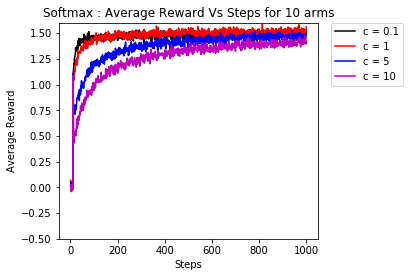

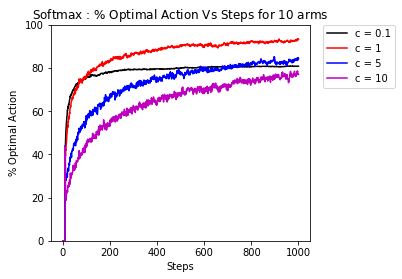

In [61]:
    plot_all(avg_reward, opt_arm, C)


Current value of c :  0
Current value of c :  1
Current value of c :  2


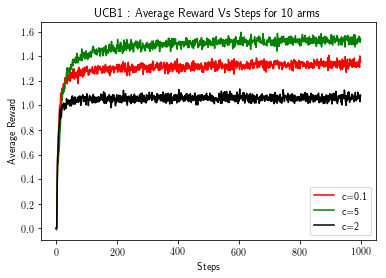

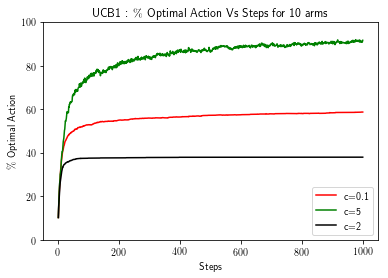

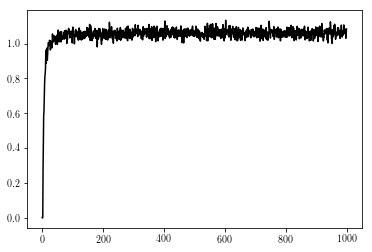

In [46]:
'''
------------------------
10 ARM TESTBED WITH UCB1
------------------------
'''

import numpy as np
import matplotlib.pyplot as plt
import random

n_bandit=2000 # number of bandit problems
k=10 # number of arms in each bandit problem
n_pulls=1000 # number of times to pull each arm

q_true=np.random.normal(0,1,(n_bandit,k)) # generating the true means q*(a) for each arm for all bandits
true_opt_arms=np.argmax(q_true,1) # the true optimal arms in each bandit
# each row represents a bandit problem

c_list=[0.1,2,0] # controls degree of exploration
col=['r','g','k']
fig1=plt.figure().add_subplot(111)
fig2=plt.figure().add_subplot(111)
fig3=plt.figure().add_subplot(111)

eps=0.1 # comparing with epsilon-greedy method
temp=0.1 # comparing with softmax method
flag=0 # using a flag variable to plot ucb vs eps vs softmax plot only for c=2 in ucb 

for c in range(len(c_list)) : 

	print ('Current value of c : ',c_list[c])

	Q=np.zeros((n_bandit,k)) # reward estimated
	N=np.ones((n_bandit,k)) # number of times each arm was pulled # each arm is pulled atleast once


	# Pull all arms once
	Qi=np.random.normal(q_true,1) # initial pulling of all arms
	avg_Qi=np.mean(Qi)

	R_c=[]
	R_c.append(0)
	R_c.append(avg_Qi)
	R_c_opt=[] # to plot % optimal action


	for pull in range(2,n_pulls+1) : 
		R_pull=[]
		opt_arm_pull=0

		for i in range(n_bandit) : 
		
			ucb_Q=Q[i]+np.sqrt(c_list[c]*np.log(pull)/N[i])
			j=np.argmax(ucb_Q)
			if j==true_opt_arms[i] : 
				opt_arm_pull=opt_arm_pull+1

			temp_R=np.random.normal(q_true[i][j],1)
			R_pull.append(temp_R)
			N[i][j]=N[i][j]+1
			Q[i][j]=Q[i][j]+(temp_R-Q[i][j])/N[i][j]

		avg_R_pull=np.mean(R_pull)

		R_c.append(avg_R_pull)
		R_c_opt.append(float(opt_arm_pull)*100/2000)

	fig1.plot(range(0,n_pulls+1),R_c,col[c])	
	fig2.plot(range(2,n_pulls+1),R_c_opt,col[c])

	
	if flag==2 : 
		fig3.plot(range(0,n_pulls+1),R_c,'k')
	flag=flag+1

plt.rc('text',usetex=True)

fig1.title.set_text('UCB1 : Average Reward Vs Steps for 10 arms')
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')
fig1.legend((r"c=0.1",r"c=2",r"c=5"),loc='best')

fig2.title.set_text(r'UCB1 : $\%$ Optimal Action Vs Steps for 10 arms')
fig2.set_ylabel(r'$\%$ Optimal Action')
fig2.set_xlabel('Steps')
fig2.set_ylim(0,100)
fig2.legend((r"c=0.1",r"c=2",r"c=5"),loc='best')

plt.show()

In [27]:
a = np.random.normal(0,1 ,(5, 2))
b = np.random.normal(a, 1)
b.shape

(5, 2)